In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91878\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Load the data
file = r"C:\Users\91878\Downloads\advertising.csv"
sale = pd.read_csv(file)


In [3]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
sale.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
sale.shape

(200, 4)

In [6]:
# Checking the missing value
sale.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# Summary statistics
sale.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# Correlation matrix
corr_matrix = sale.corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


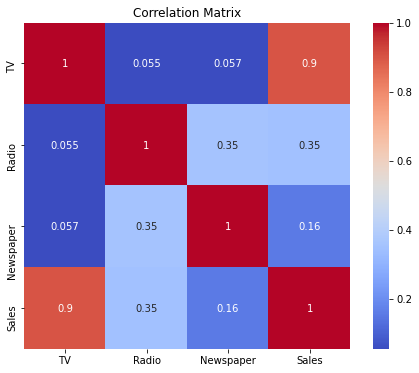

In [9]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

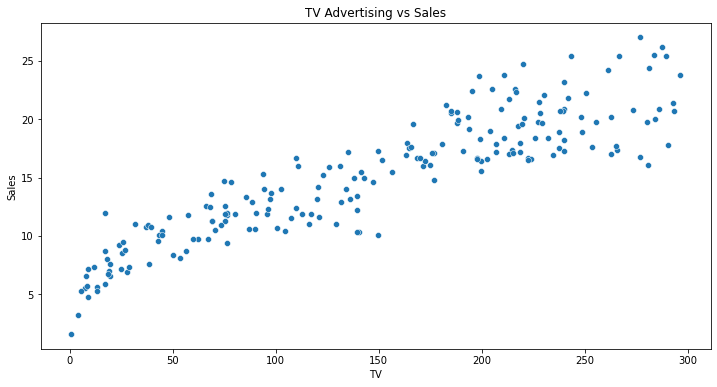

In [10]:
# Scatter plots of advertising channels vs sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x="TV", y="Sales", data=sale)
plt.title("TV Advertising vs Sales")
plt.show()

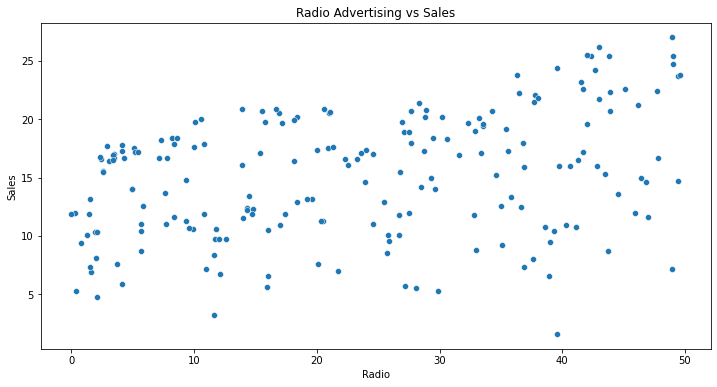

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Radio", y="Sales", data=sale)
plt.title("Radio Advertising vs Sales")
plt.show()


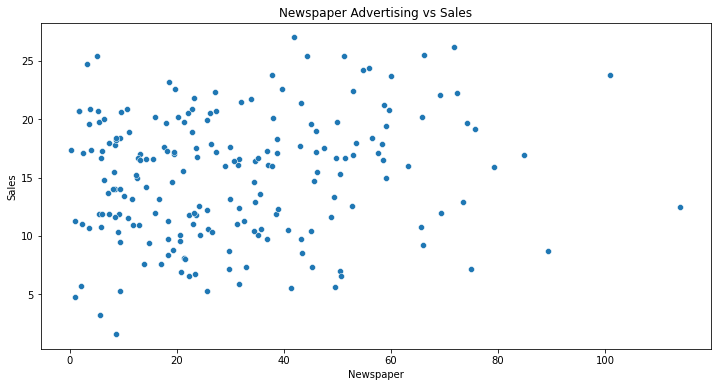

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Newspaper", y="Sales", data=sale)
plt.title("Newspaper Advertising vs Sales")
plt.show()

In [13]:
# Split the data into features and target
X = sale[['TV', 'Radio', 'Newspaper']]
y = sale['Sales']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.907756910271092
R-squared: 0.9059011844150826


In [18]:
pd.DataFrame(y_pred).to_csv("sales.csv",index=False)

In [19]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Predicting on the test set
y_pred = rf.predict(X_test)


In [22]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [23]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1.4374328500000009
Root Mean Squared Error (RMSE): 1.1989298770153327


In [24]:
pd.DataFrame(y_pred).to_csv("sale.csv",index=False)